In [1]:
library('igraph')
library('Matrix')
library('pracma')
set.seed(1)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




## Erdős–Rényi Model

Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions.

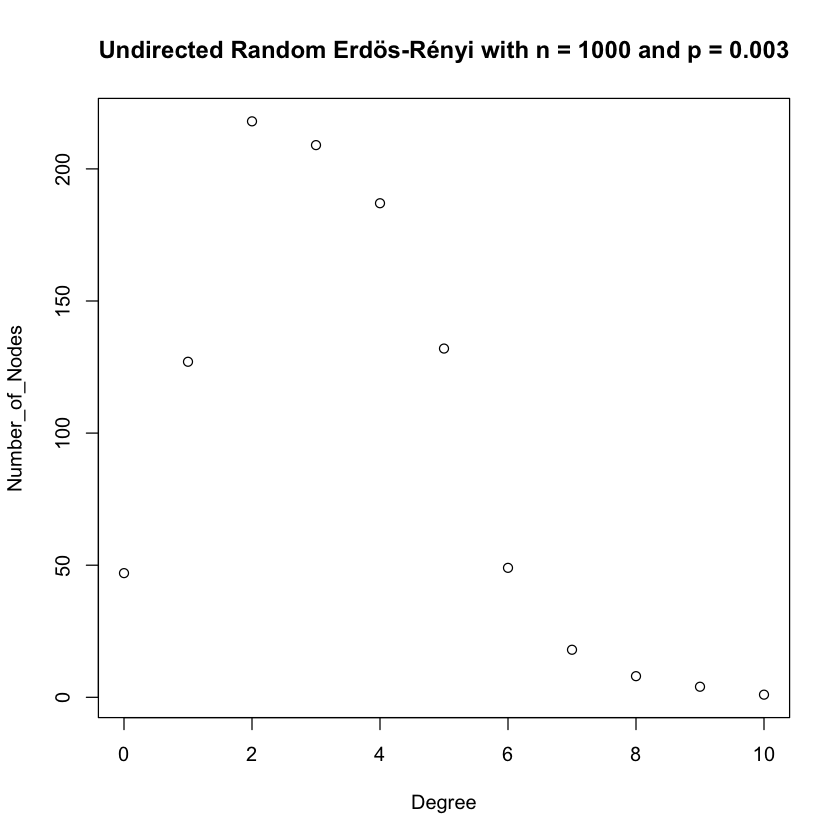

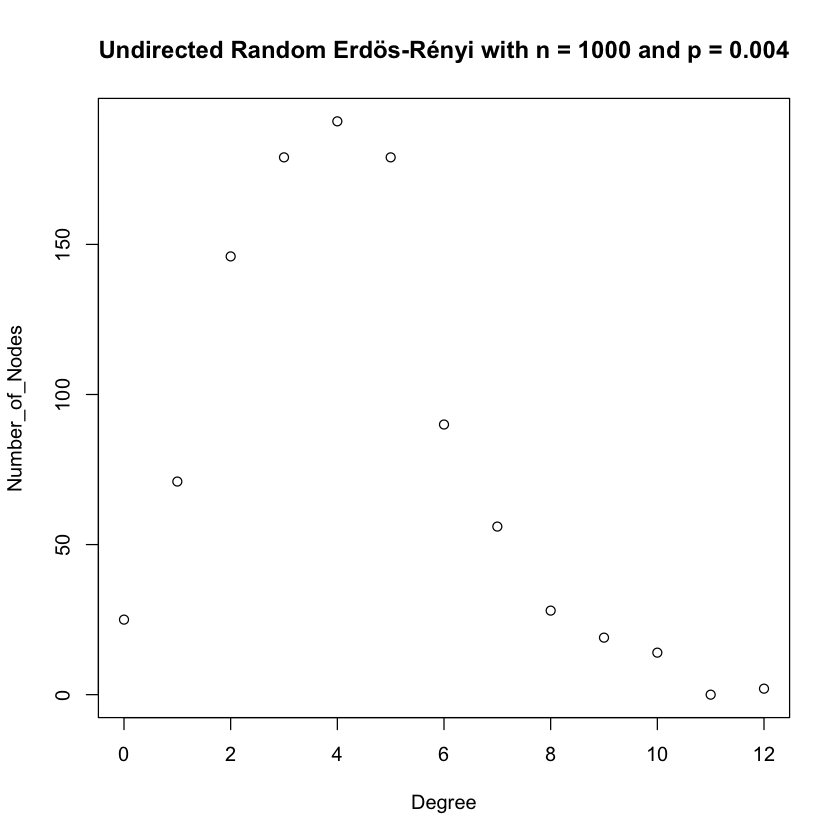

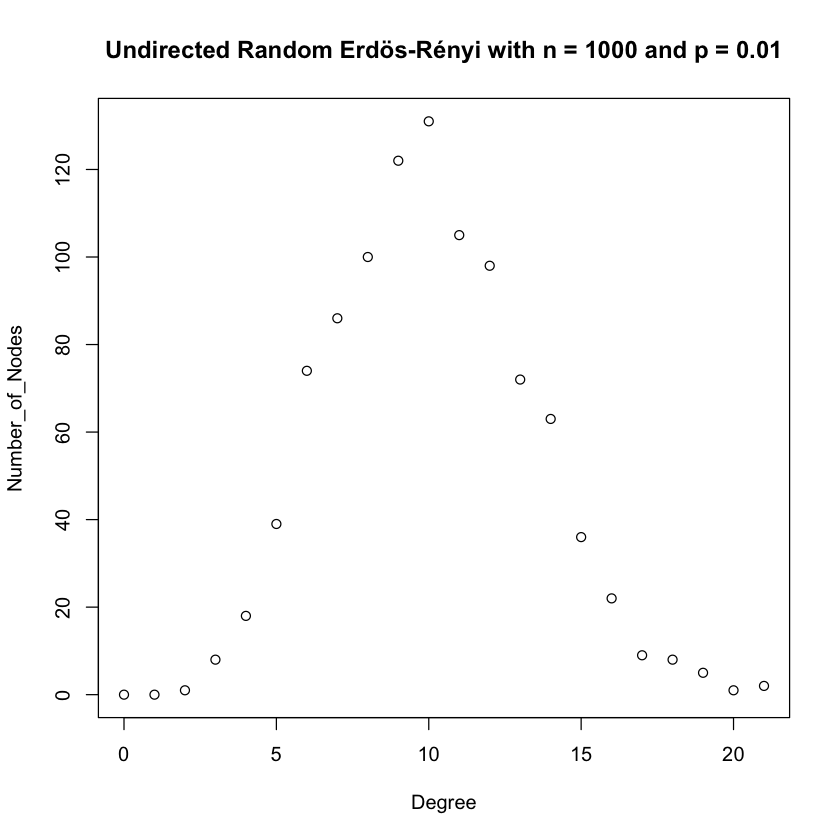

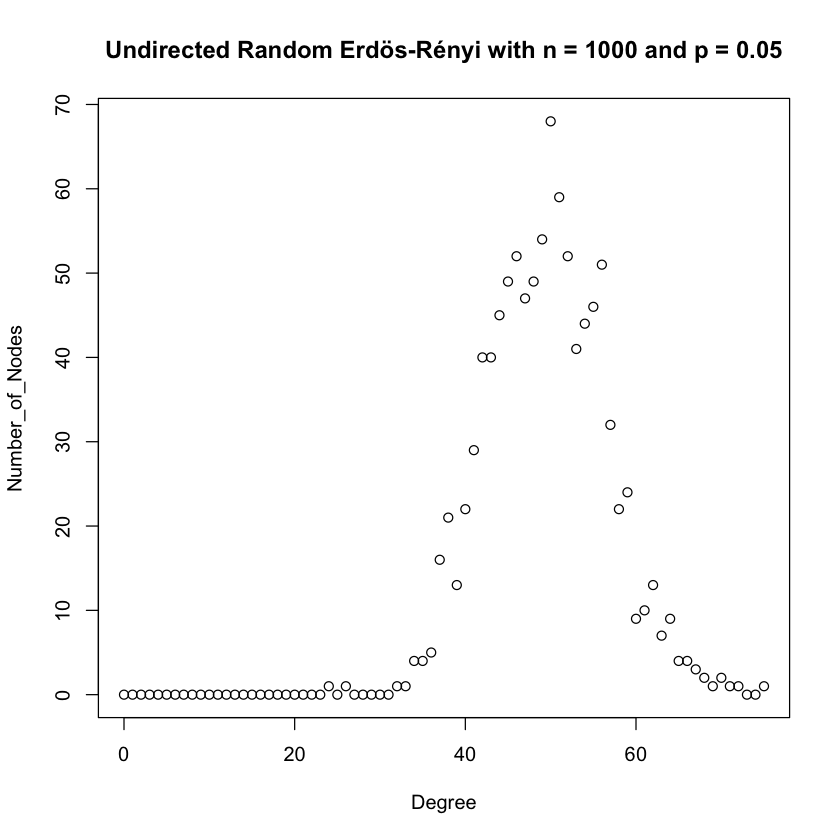

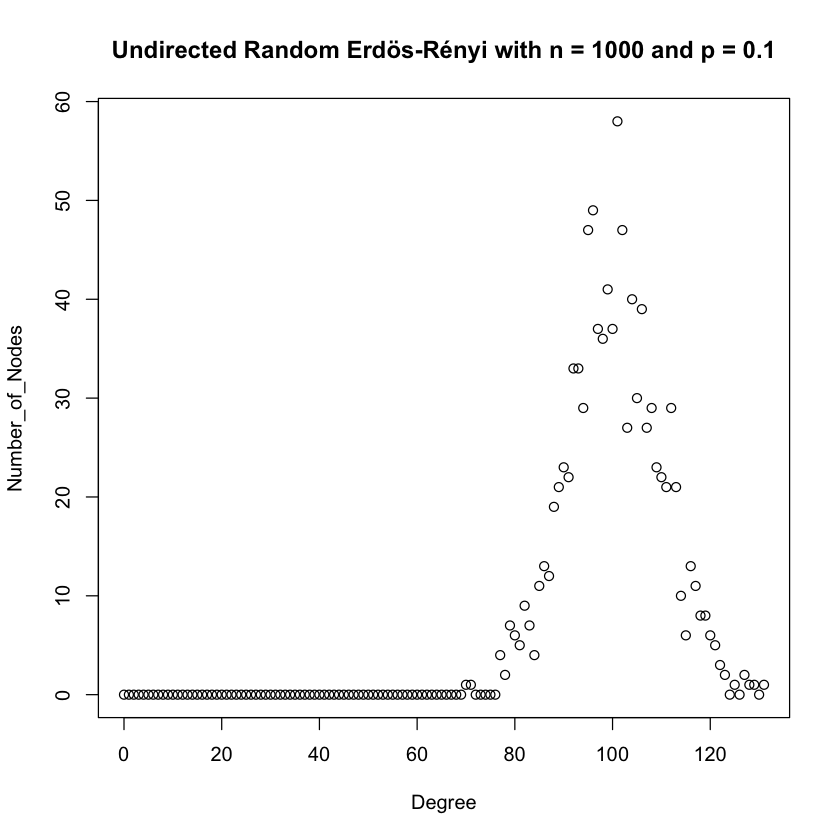

In [2]:
n = 1000
prob_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
prob_len = length(prob_list)
dd_list = list(1:prob_len)
g_list = list(1:prob_len)
for (i in 1:prob_len){
    g_np = sample_gnp(n=n, p=prob_list[i], directed = FALSE)
    g_list[[i]] = g_np 
    dd = degree_distribution(g_np) * n
    dd_list[[i]] = dd 
    dd.data = data.frame(
       Degree = 0:(length(dd)-1),
        Number_of_Nodes = dd
)
    
    plot(dd.data, main = paste0("Undirected Random Erdös-Rényi with n = 1000 and p = ", prob_list[i]))
}

What distribution is observed? Explain why. 

In [3]:
for (i in 1:prob_len){
    cat("degree distribution for p =", prob_list[i], ":", dd_list[[i]], "\n")
    }

degree distribution for p = 0.003 : 47 127 218 209 187 132 49 18 8 4 1 
degree distribution for p = 0.004 : 25 71 146 179 191 179 90 56 28 19 14 0 2 
degree distribution for p = 0.01 : 0 0 1 8 18 39 74 86 100 122 131 105 98 72 63 36 22 9 8 5 1 2 
degree distribution for p = 0.05 : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 4 4 5 16 21 13 22 29 40 40 45 49 52 47 49 54 68 59 52 41 44 46 51 32 22 24 9 10 13 7 9 4 4 3 2 1 2 1 1 0 0 1 
degree distribution for p = 0.1 : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 4 2 7 6 5 9 7 4 11 13 12 19 21 23 22 33 33 29 47 49 37 36 41 37 58 47 27 40 30 39 27 29 23 22 21 29 21 10 6 13 11 8 8 6 5 3 2 0 1 0 2 1 1 0 1 


Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [4]:
for (i in 1:prob_len){
    mu = dot(dd_list[[i]], c(0:(length(dd_list[[i]])-1))) /  n
    dd_var = dot((c(0:(length(dd_list[[i]])-1)) - mu)^2, dd_list[[i]]) / n
    th_mu = n*prob_list[i]
    th_dd_var = n*prob_list[i]*(1 - prob_list[i])
    cat("mean degree and variance for p =", prob_list[i], ":", mu, "and" , dd_var, "\n")
    cat("binomial mean degree and variance for p =", prob_list[i], ":", th_mu, "and" , th_dd_var, "\n")
    cat("poisson mean degree and variance for p =", prob_list[i], ":", th_mu, "and" , th_mu, "\n")
    print(data.frame(mean=c(mu, th_mu, th_mu), var=c(dd_var, th_dd_var, th_mu)))
}

mean degree and variance for p = 0.003 : 3.128 and 2.969616 
binomial mean degree and variance for p = 0.003 : 3 and 2.991 
poisson mean degree and variance for p = 0.003 : 3 and 3 
   mean      var
1 3.128 2.969616
2 3.000 2.991000
3 3.000 3.000000
mean degree and variance for p = 0.004 : 4.05 and 4.3975 
binomial mean degree and variance for p = 0.004 : 4 and 3.984 
poisson mean degree and variance for p = 0.004 : 4 and 4 
  mean    var
1 4.05 4.3975
2 4.00 3.9840
3 4.00 4.0000
mean degree and variance for p = 0.01 : 10.042 and 10.10224 
binomial mean degree and variance for p = 0.01 : 10 and 9.9 
poisson mean degree and variance for p = 0.01 : 10 and 10 
    mean      var
1 10.042 10.10224
2 10.000  9.90000
3 10.000 10.00000
mean degree and variance for p = 0.05 : 49.546 and 47.60788 
binomial mean degree and variance for p = 0.05 : 50 and 47.5 
poisson mean degree and variance for p = 0.05 : 50 and 50 
    mean      var
1 49.546 47.60788
2 50.000 47.50000
3 50.000 50.00000
mean deg

For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. 

In [5]:
prob_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
prob_len = length(prob_list)
for (i in 1:prob_len){
    cat("Undirected Random Erdös-Rényi with n = 1000 and p = ", prob_list[i], "\n")
#     cat("# of vertices:", vcount(g_list[[i]]), "\n")
#     cat("# of edges:", ecount(g_list[[i]]), "\n")
    cat("Is connected:", is_connected(g_list[[i]]), "\n")
    cat("GCC size:", clusters(g_list[[i]])$csize[1], "\n")
    cat("GCC diameter:", diameter(g_list[[i]]), "\n")
    }

Undirected Random Erdös-Rényi with n = 1000 and p =  0.003 
Is connected: FALSE 
GCC size: 1 
GCC diameter: 14 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.004 
Is connected: FALSE 
GCC size: 973 
GCC diameter: 11 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.01 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 5 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.05 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 3 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.1 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 3 


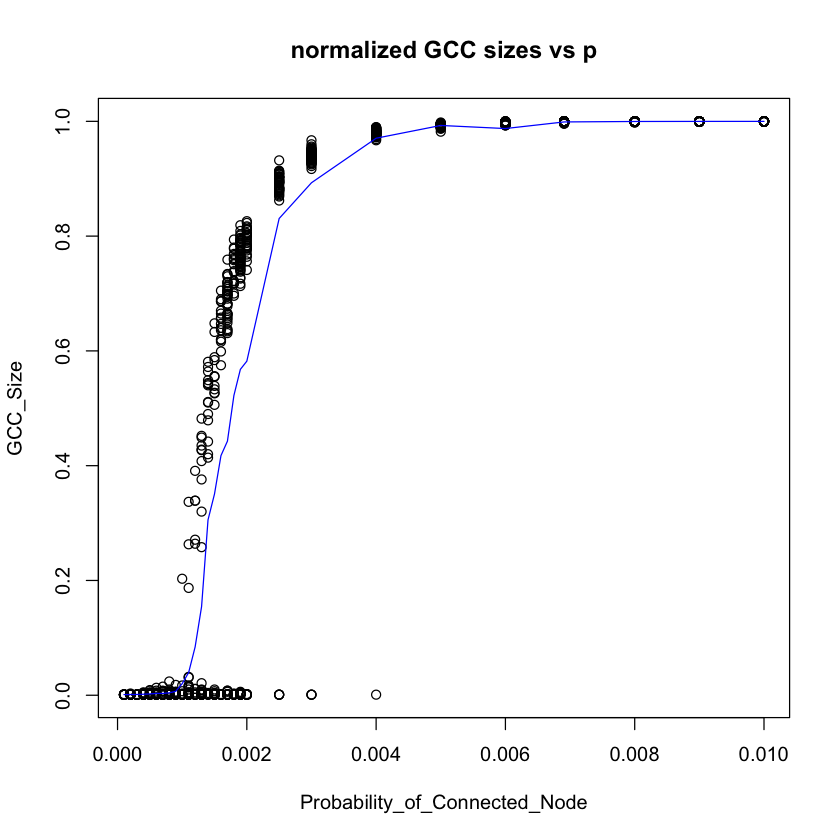

In [6]:
n = 1000
prob_list = c(0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,  0.0017, 0.0018, 0.0019, 0.002, 0.0025, 0.003, 0.004, 0.005, 0.006, 0.00690775527, 0.008, 0.009,  0.01)
# prob_list = c(0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.00690775527)

prob_len = length(prob_list)
iter = 100
GCC_Size = c(1:prob_len*iter)
Probability_of_Connected_Node = c(1:prob_len*iter)
avg_gcc = c(1:prob_len)

for (i in 1:prob_len){
    gcc_list = c(1:iter)
    for (j in 1:iter){
        g_np = sample_gnp(n=n, p=prob_list[i], directed = FALSE)
        gcc = clusters(g_np)$csize[1]/n
        gcc_list[j] = gcc
        GCC_Size[i*j] = gcc
        Probability_of_Connected_Node[i*j] = prob_list[i]
    }
    avg_gcc[i] = mean(gcc_list)
}

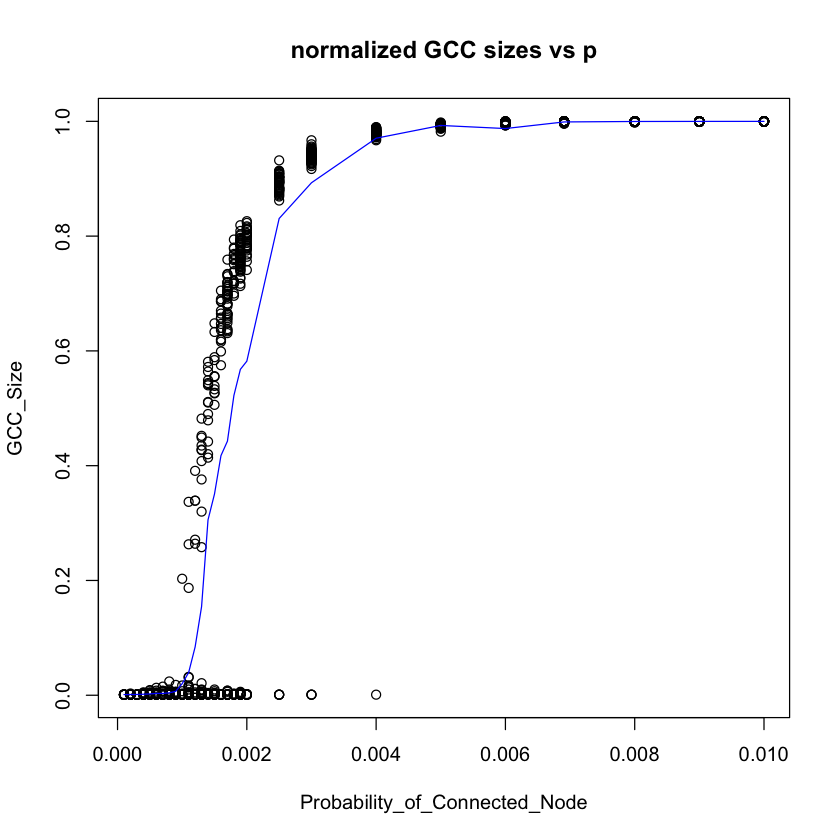

In [7]:
plot(Probability_of_Connected_Node, GCC_Size, main="normalized GCC sizes vs p") #, ylim=c(0.995,1))
lines(prob_list,avg_gcc,col="blue")

Define the average degree of nodes c = n × p = 0.5. Sweep over the number of nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed?

In [25]:
const = 0.5
n_list = c(100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)
prob_list = const / n_list 

prob_len = length(prob_list)
iter = 1000
avg_gcc = c(1:prob_len)

for (i in 1:prob_len){
    gcc_list = c(1:iter)
    for (j in 1:iter){
        g_np = sample_gnp(n=n_list[i], p=prob_list[i], directed = FALSE)
        gcc = clusters(g_np)$csize[1]/n_list[i]
        gcc_list[j] = gcc
    }
    avg_gcc[i] = mean(gcc_list)
}

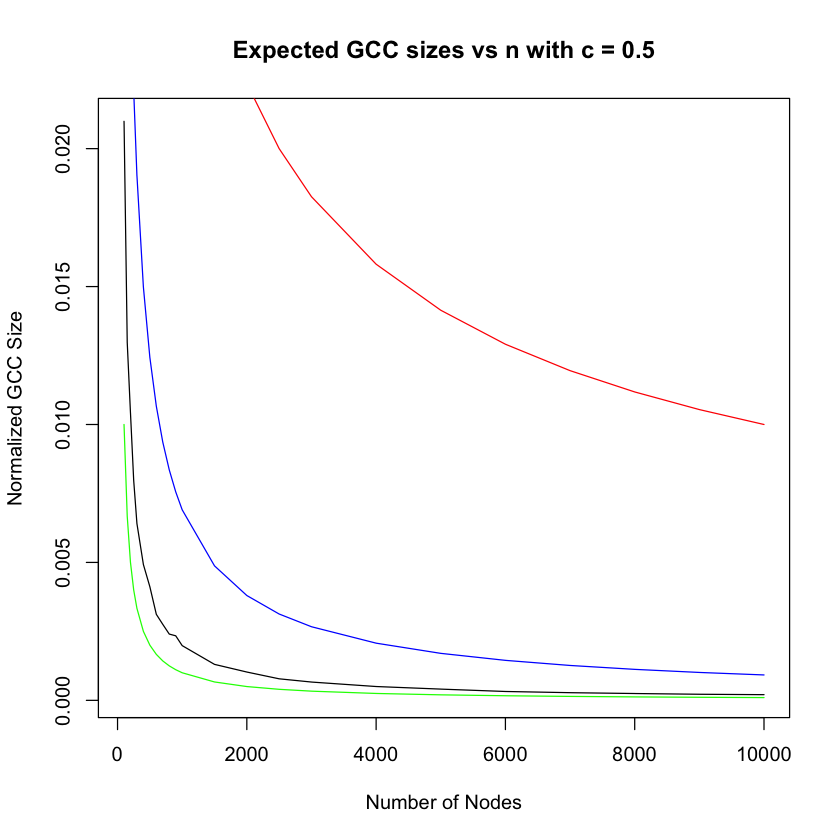

In [28]:
plot(n_list, avg_gcc, type = "l", main="Expected GCC sizes vs n with c = 0.5", ylab="Normalized GCC Size", xlab="Number of Nodes")
lines(n_list,log(n_list)/n_list,col="blue")
lines(n_list,1/(n_list),col="green")
lines(n_list,sqrt(n_list)/n_list,col="red")

Repeat the same for c = 1.

In [10]:
const = 1
n_list = c(100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)
prob_list = const / n_list 

prob_len = length(prob_list)
iter = 1000
avg_gcc = c(1:prob_len)

for (i in 1:prob_len){
    gcc_list = c(1:iter)
    for (j in 1:iter){
        g_np = sample_gnp(n=n_list[i], p=prob_list[i], directed = FALSE)
        gcc = clusters(g_np)$csize[1]/n_list[i]
        gcc_list[j] = gcc
    }
    avg_gcc[i] = mean(gcc_list)
}

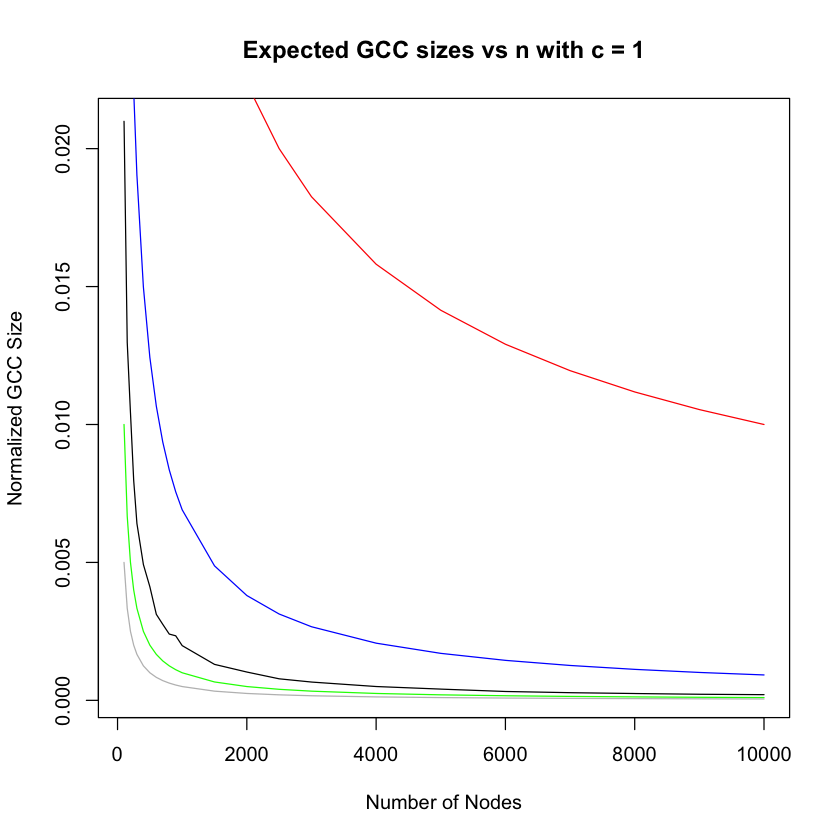

In [29]:
plot(n_list, avg_gcc, type = "l", main="Expected GCC sizes vs n with c = 1", ylab="Normalized GCC Size", xlab="Number of Nodes")
lines(n_list,log(n_list)/n_list,col="blue")
lines(n_list,1/(n_list),col="green")
lines(n_list,sqrt(n_list)/n_list,col="red")
lines(n_list,prob_list,col="grey")

Repeat the same for values of c = 1.1,1.2,1.3, and show the results for these three values in a single plot.

In [12]:
const_list = c(1.1, 1.2, 1.3)
n_list = c(100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)
iter = 1000
avg_list = list(1:3)
for (k in 1:3){
    prob_list = const / n_list 
    prob_len = length(prob_list)
    avg_gcc = c(1:prob_len)

    for (i in 1:prob_len){
        gcc_list = c(1:iter)
        for (j in 1:iter){
            g_np = sample_gnp(n=n_list[i], p=prob_list[i], directed = FALSE)
            gcc = clusters(g_np)$csize[1]/n_list[i]
            gcc_list[j] = gcc
        }
        avg_gcc[i] = mean(gcc_list)
    }
    avg_list[[k]] = avg_gcc
}

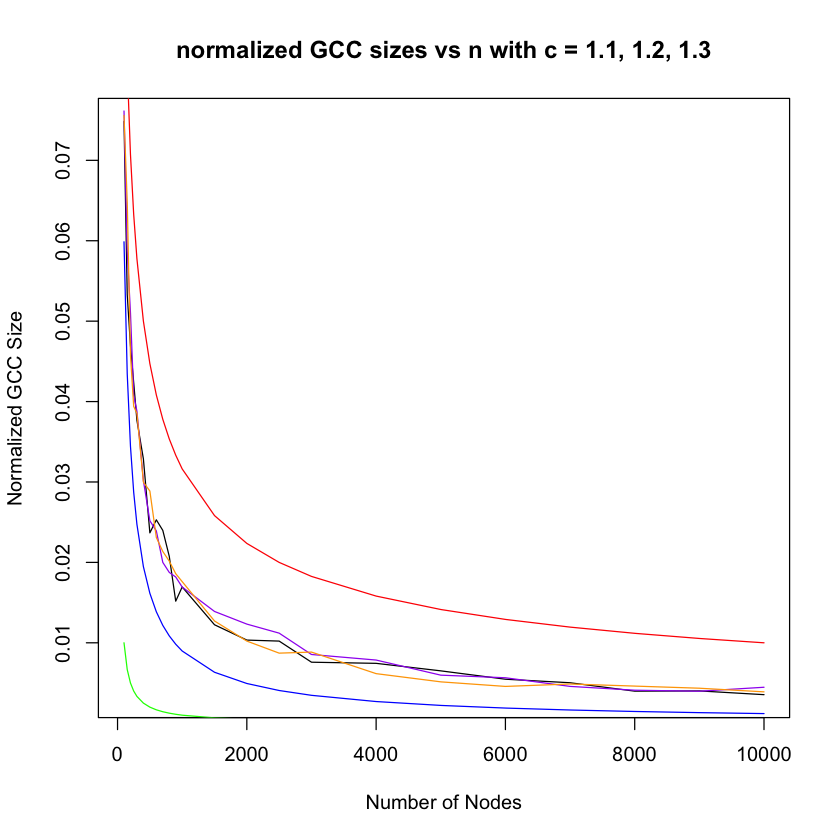

In [32]:
plot(n_list, avg_list[[1]], type="l", main="normalized GCC sizes vs n with c = 1.1, 1.2, 1.3", ylab="Normalized GCC Size", xlab="Number of Nodes") #, ylim=c(0.995,1))
lines(n_list,avg_list[[2]],col="purple")
lines(n_list,avg_list[[3]],col="orange")
lines(n_list,1.3*log(n_list)/n_list,col="blue")
lines(n_list,1/(n_list),col="green")
lines(n_list,sqrt(n_list)/n_list,col="red")

## Preferential Attachment Model

Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [121]:
n = 1000
m = 1
g_pa = sample_pa(n=n, m=m, directed = FALSE)
cat("Is connected:", is_connected(g_pa), "\n")

Is connected: TRUE 


Use fast greedy method to find the community structure. Measure modularity.

In [122]:
comm = cluster_fast_greedy(g_pa)
mod = modularity(comm)
print(mod)

[1] 0.9313453


Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

In [124]:
n = 10000
m = 1
g_pa2 = sample_pa(n=n, m=m, directed = FALSE)
cat("Is connected:", is_connected(g_pa2), "\n")
comm2 = cluster_fast_greedy(g_pa2)
mod2 = modularity(comm2)
print(mod2)

Is connected: TRUE 
[1] 0.9781178


Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression.

 [1]   0 585 225  78  38  29  15   9   4   4   1   2   2   1   0   1   1   0   2
[20]   0   0   1   0   0   0   0   1   0   1
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“10 y values <= 0 omitted from logarithmic plot”


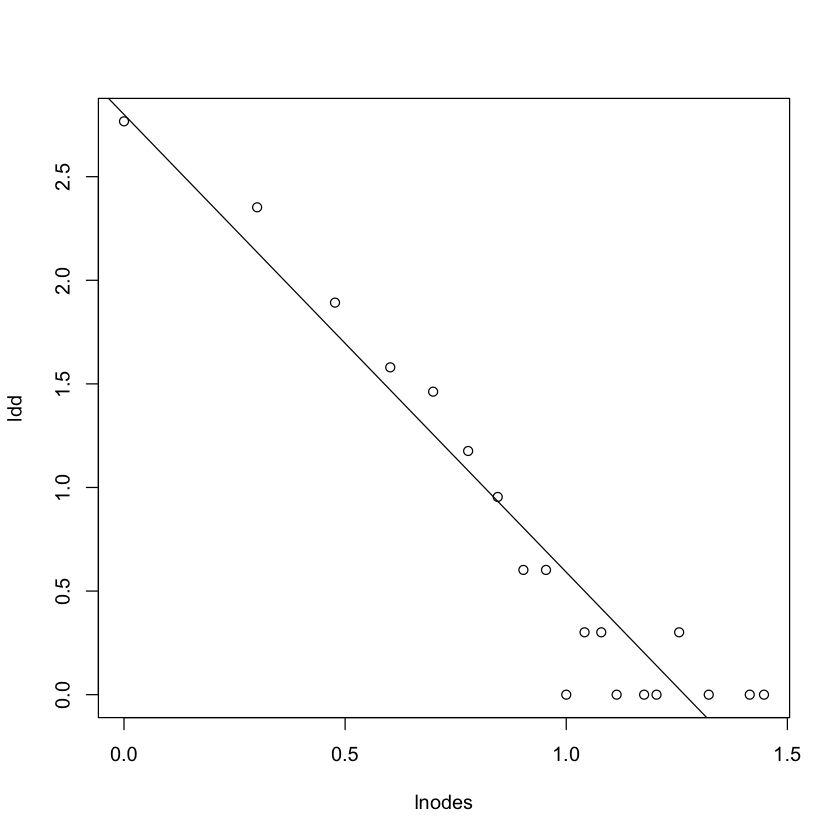

(Intercept)      lnodes 
   2.800167   -2.209139 


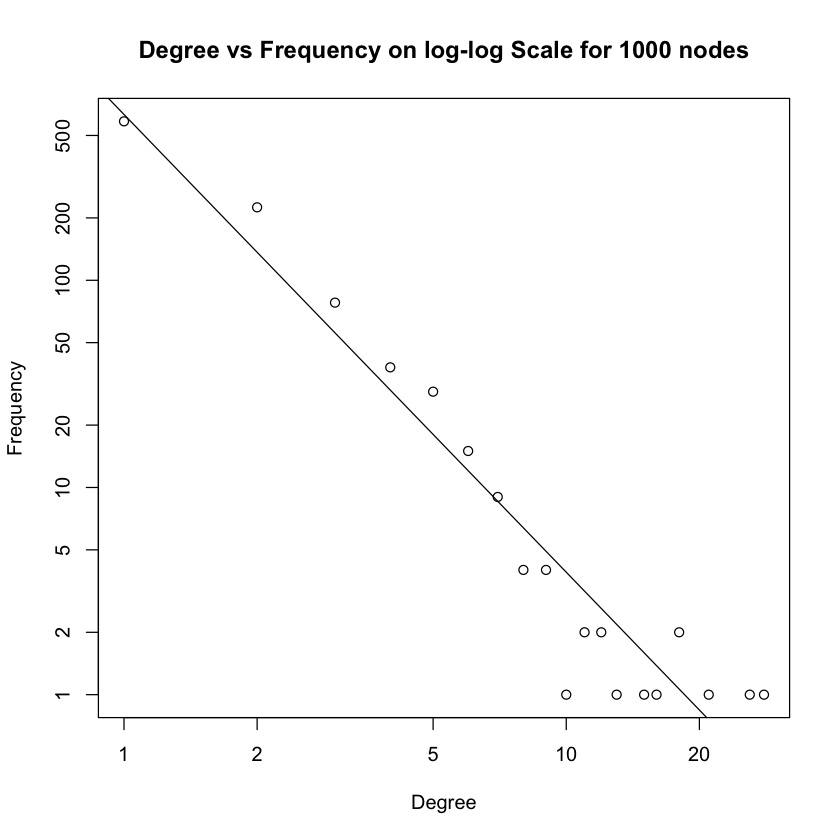

In [290]:
dd = degree_distribution(g_pa, mode="all")*1000
nodes = c(0:(length(dd)-1))

ldd = log(dd,base=10)
to_remove = which(ldd == -Inf)
ldd = ldd[-to_remove]
lnodes = log(nodes[-to_remove],base=10)
coeff = lm(ldd~lnodes)$coefficients
plot(dd~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 1000 nodes", xlab="Degree", ylab="Frequency") 
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“23 y values <= 0 omitted from logarithmic plot”


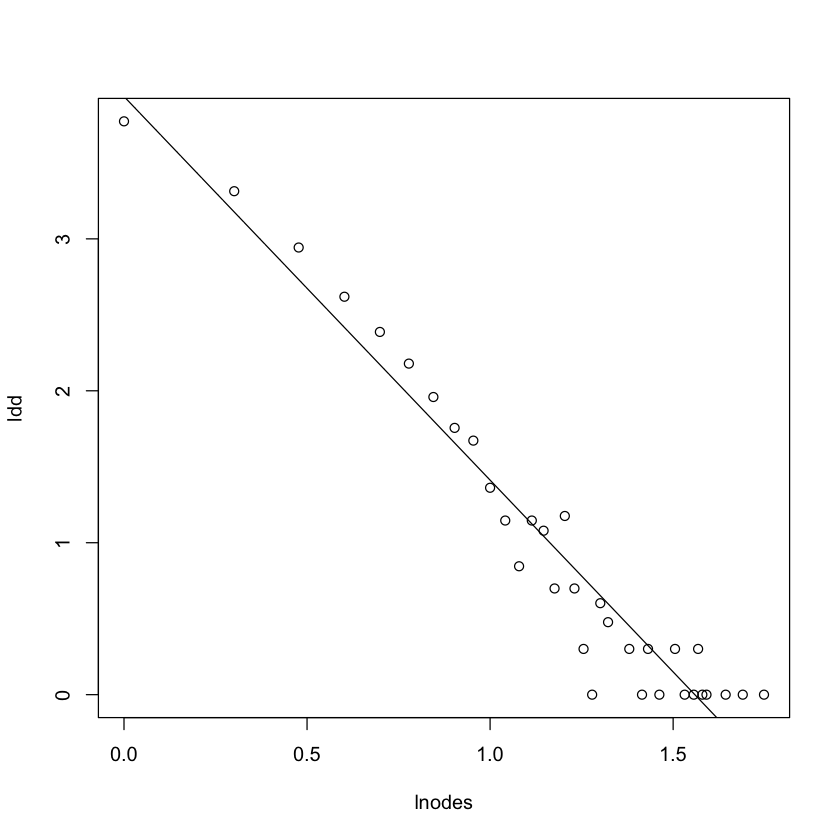

(Intercept)      lnodes 
   3.936887   -2.524795 


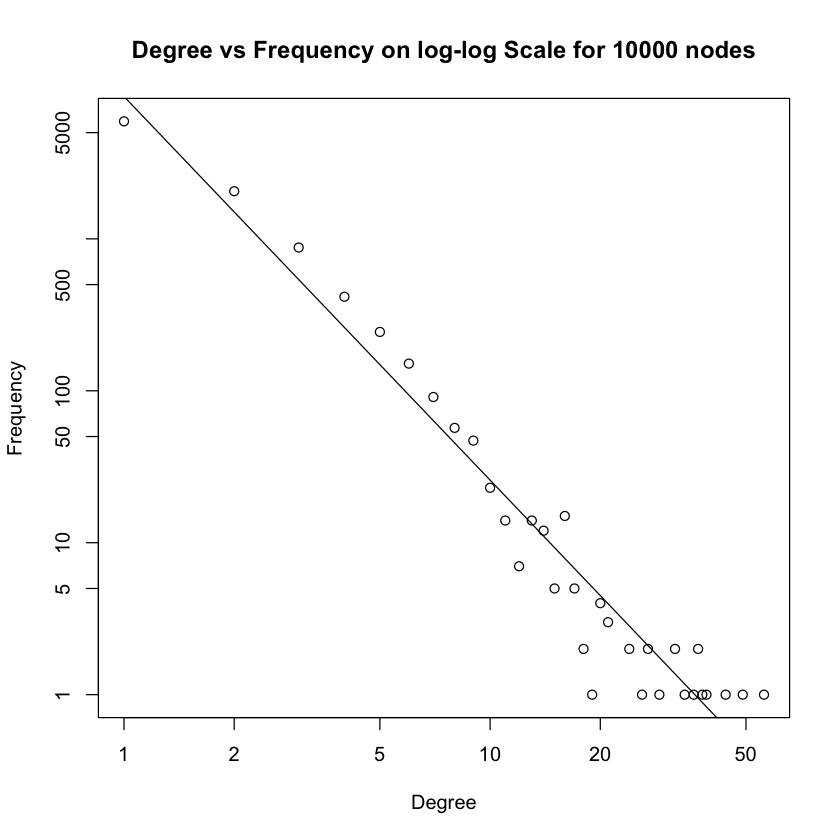

In [291]:
dd2 = degree_distribution(g_pa2)*10000
nodes = c(0:(length(dd2)-1))

ldd = log(dd2,base=10)
to_remove = which(ldd == -Inf)
ldd = ldd[-to_remove]
lnodes = log(nodes[-to_remove],base=10)
coeff = lm(ldd~lnodes)$coefficients
plot(dd2~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 10000 nodes", xlab="Degree", ylab="Frequency")  
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

In the two networks generated, perform the following:
Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?	

In [292]:
iter = 1000
degree_list = c(1:iter)
for (i in 1:iter){
    i_node = sample(c(1:1000), size=1)
#     print(i_node)
    j_cand = neighbors(g_pa, i_node)
#     print(j_cand)
    j_node = sample(j_cand, size=1)
#     print(degree(g_pa, j_node))
    degree_list[i] = degree(g_pa, j_node)
}
dd3 = cbind(table(degree_list))
# print(dd3)
nodes = as.integer(names(table(degree_list)))
# print(nodes)

   [,1]
1   315
2   195
3    99
4    68
5    79
6    37
7    47
8    19
9    12
10    2
11   15
12   12
13    6
15   19
16   17
18   24
21    6
26   11
28   17
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 18 21 26 28


(Intercept)      lnodes 
   2.451416   -1.146279 


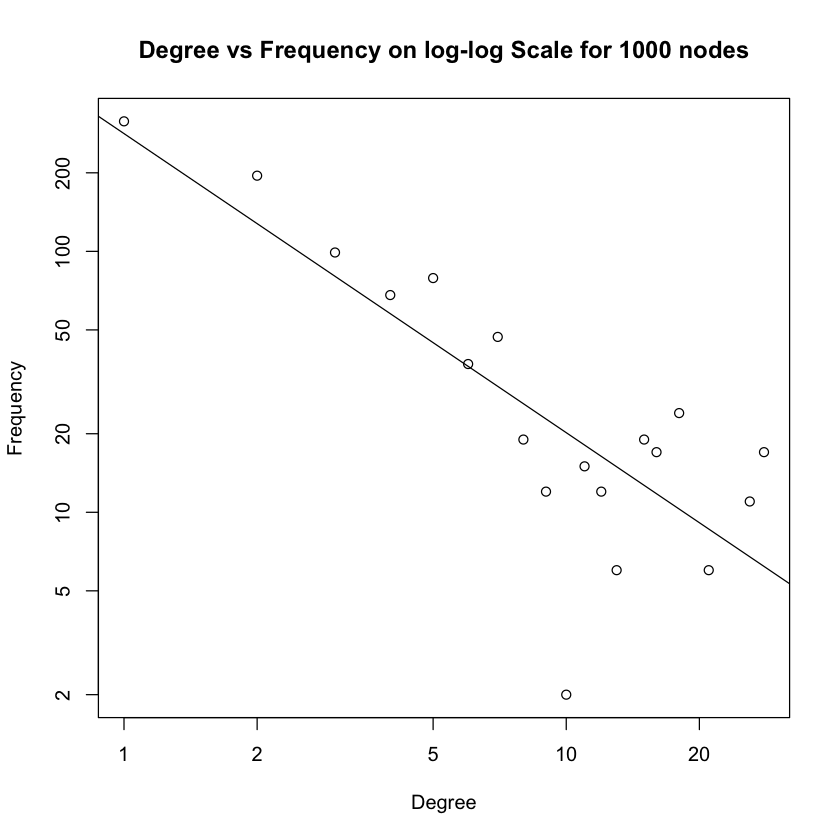

In [293]:
ldd = log(dd3,base=10)
lnodes = log(nodes,base=10)

coeff = lm(ldd~lnodes)$coefficients
plot(dd3~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 1000 nodes", xlab="Degree", ylab="Frequency")  
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

In [294]:
iter = 1000
degree_list = c(1:iter)
for (i in 1:iter){
    i_node = sample(c(1:1000), size=1)
#     print(i_node)
    j_cand = neighbors(g_pa2, i_node)
#     print(j_cand)
    j_node = sample(j_cand, size=1)
#     print(degree(g_pa, j_node))
    degree_list[i] = degree(g_pa2, j_node)
}
dd4 = cbind(table(degree_list))
# print(dd4)
nodes = as.integer(names(table(degree_list)))
# print(nodes)

   [,1]
1   296
2   174
3    79
4    60
5    53
6    57
7    43
8    28
9    21
10   20
11    3
12   13
13   11
14   13
15    7
16   29
17   11
18    1
20   17
21    7
24    3
26    4
27    4
29    5
32    4
34    4
36    3
37    6
38    4
39    3
44    5
49    6
56    6
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 24 26 27 29 32
[26] 34 36 37 38 39 44 49 56


(Intercept)      lnodes 
   2.448043   -1.190399 


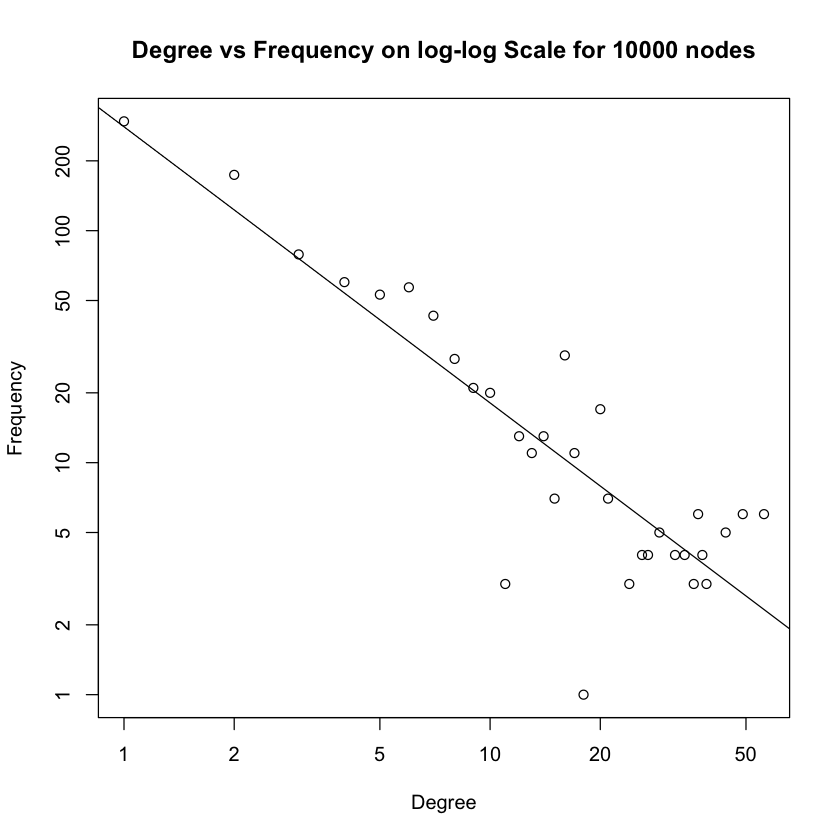

In [295]:
ldd = log(dd4,base=10)
lnodes = log(nodes,base=10)

coeff = lm(ldd~lnodes)$coefficients
plot(dd4~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 10000 nodes", xlab="Degree", ylab="Frequency")  
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

In [303]:
iter = 1000
n = 1000
m = 1
degree_list = c(1:n)*0
for (i in 1:iter){
g_pa = sample_pa(n=n, m=m, directed = FALSE)
degree_list = degree_list+degree(g_pa)
    }


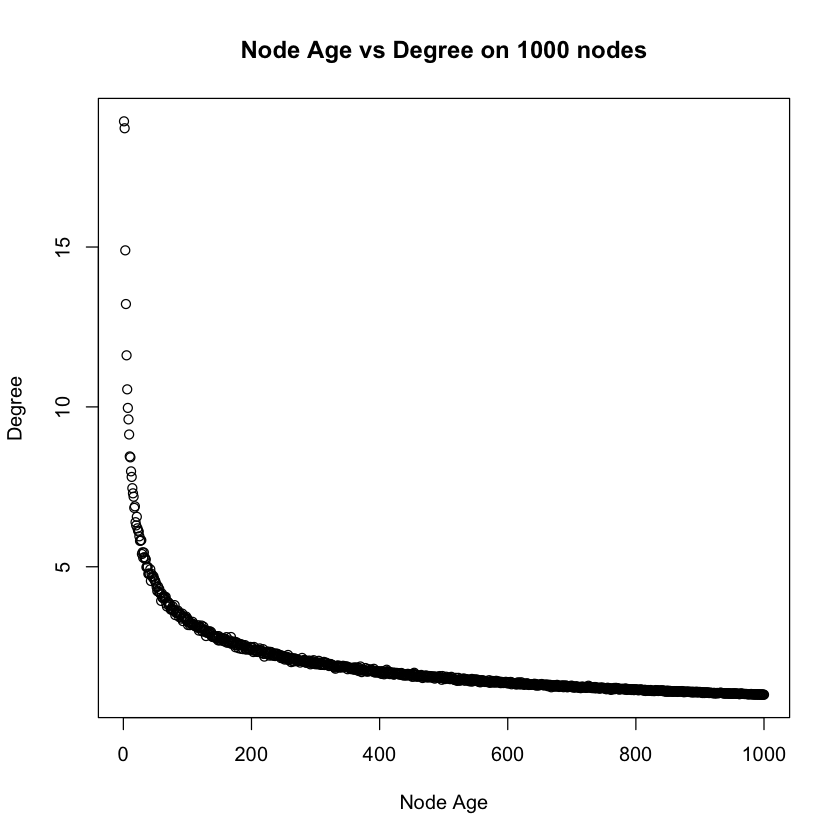

In [304]:
# print(degree_list/iter)
plot(degree_list/iter, main="Node Age vs Degree on 1000 nodes", xlab="Node Age", ylab="Degree")

Repeat the previous parts for m = 2, and m = 5. Compare the results of each part for different values of m.

Is connected: TRUE 
[1] 0.5218218
Is connected: TRUE 
[1] 0.5305594


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“46 y values <= 0 omitted from logarithmic plot”


(Intercept)      lnodes 
   2.976990   -1.951801 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“66 y values <= 0 omitted from logarithmic plot”


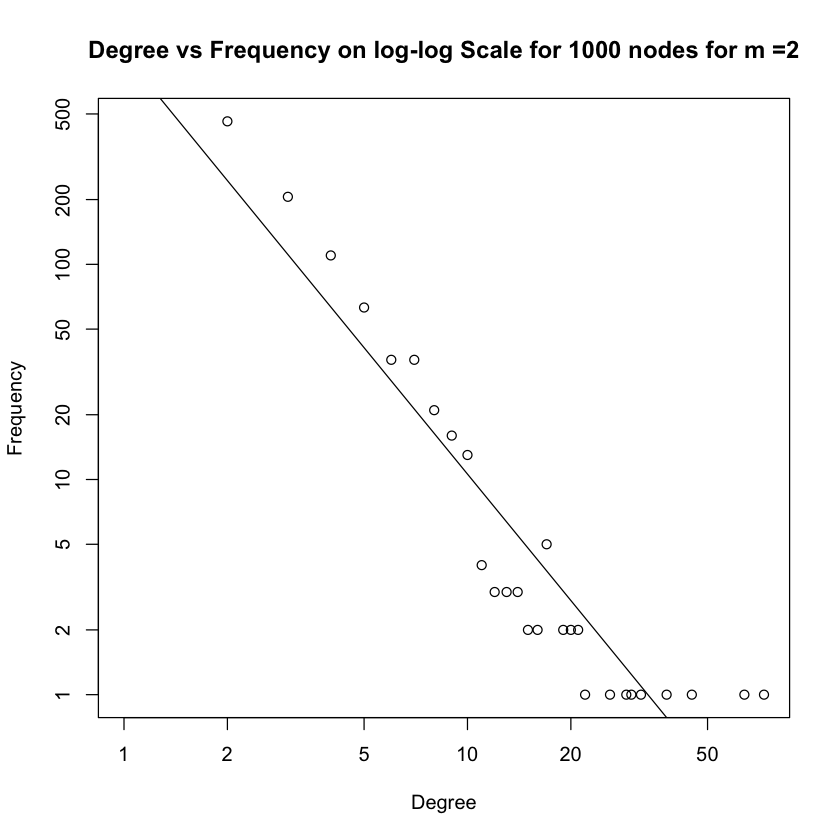

(Intercept)      lnodes 
   4.354851   -2.468043 


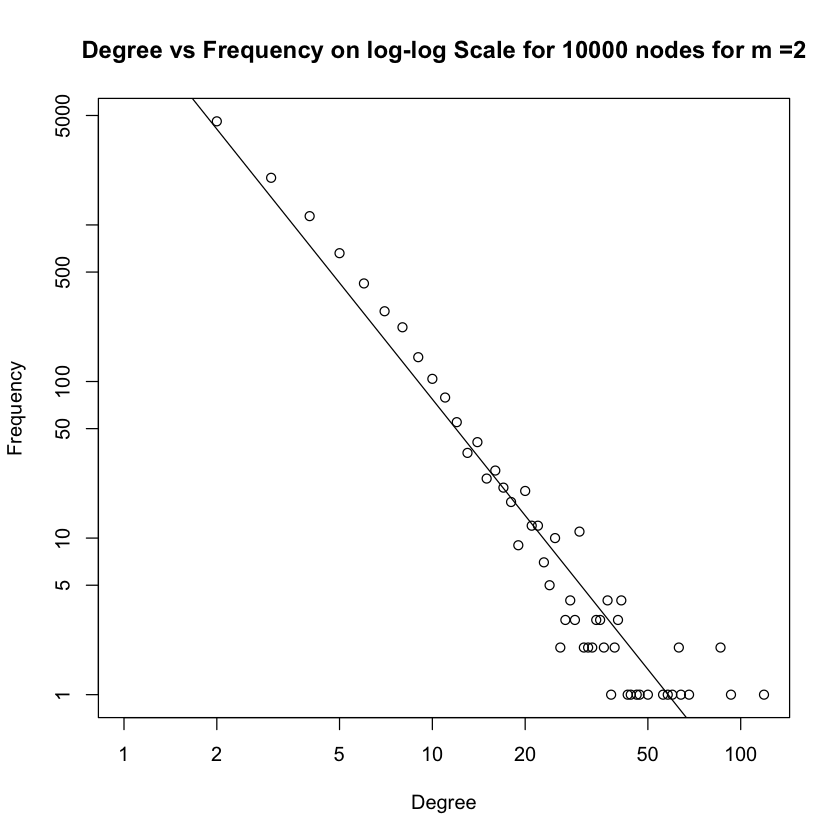

(Intercept)      lnodes 
   2.454912   -1.016192 


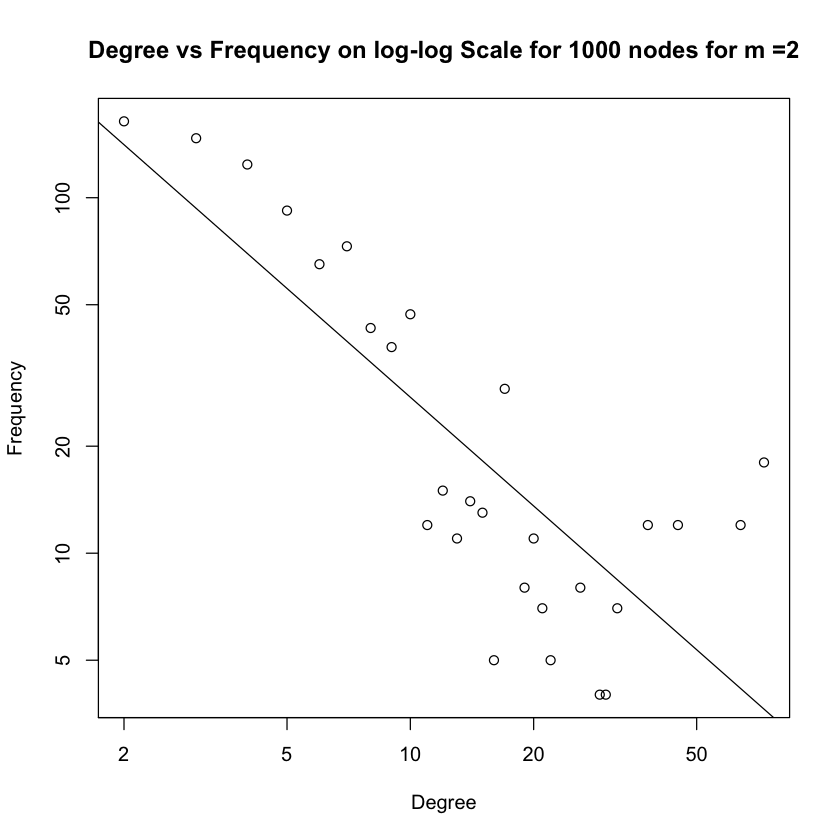

(Intercept)      lnodes 
   2.454685   -1.162210 
Is connected: TRUE 
[1] 0.273317
Is connected: TRUE 
[1] 0.2765817


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“51 y values <= 0 omitted from logarithmic plot”


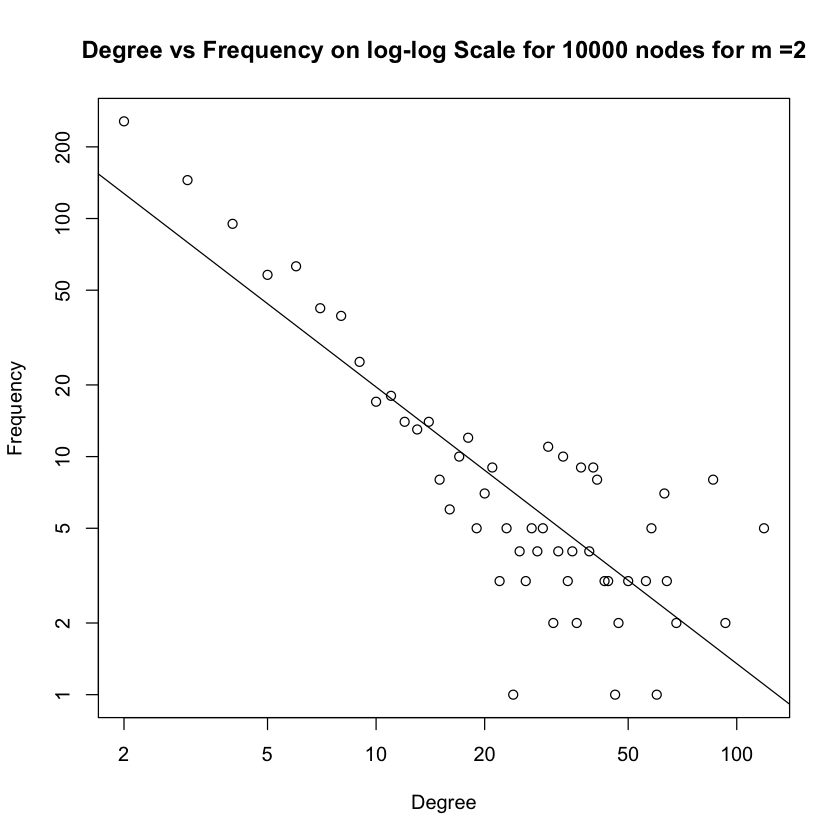

(Intercept)      lnodes 
   3.516182   -2.007923 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“213 y values <= 0 omitted from logarithmic plot”


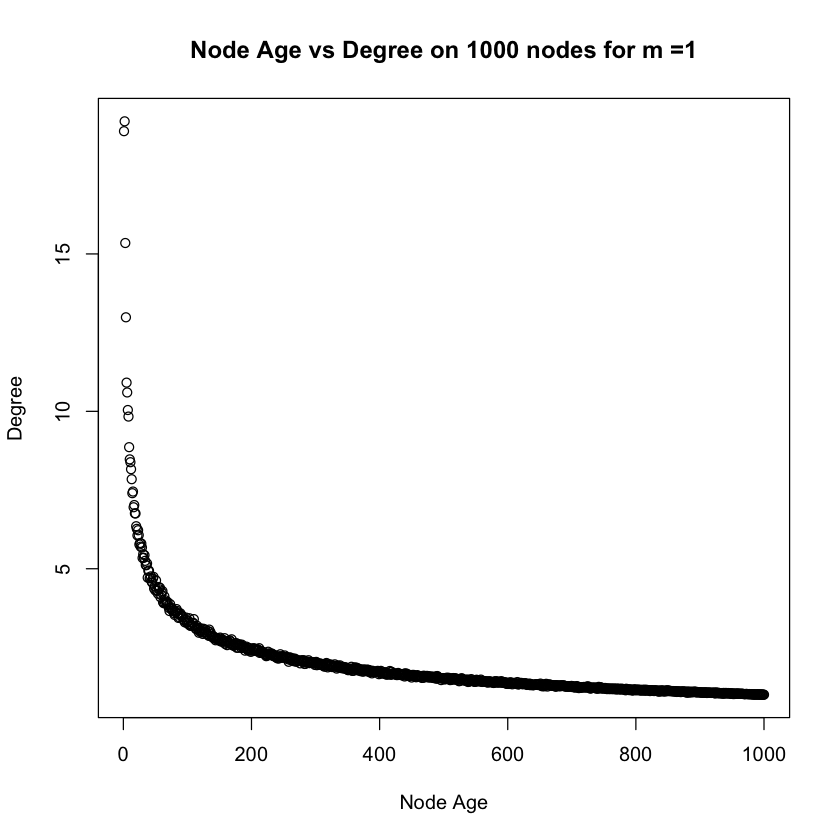

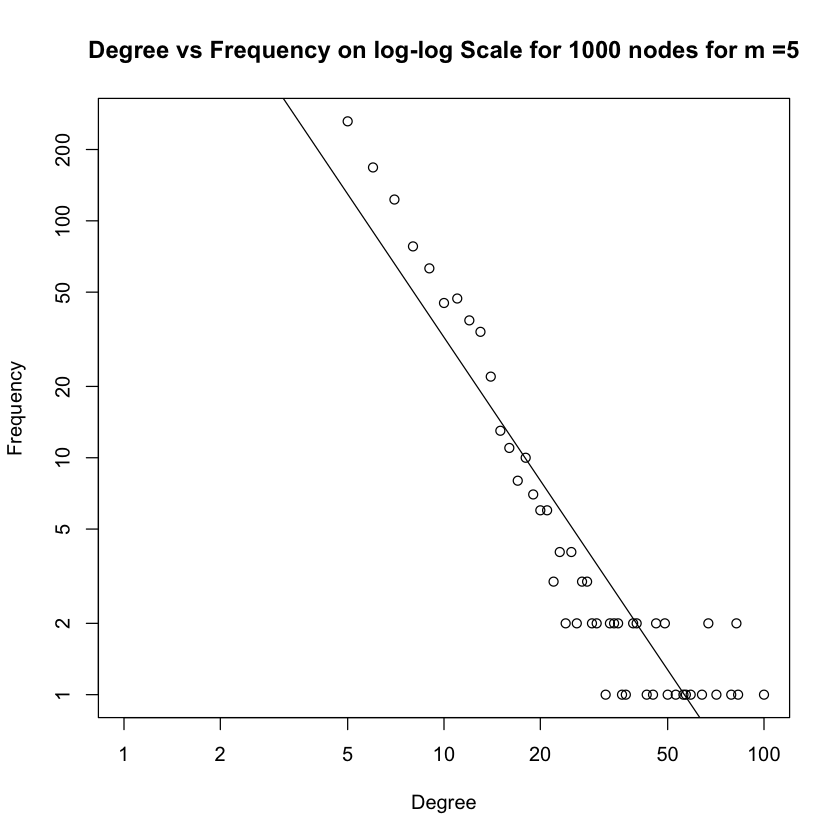

(Intercept)      lnodes 
   4.513830   -2.159717 


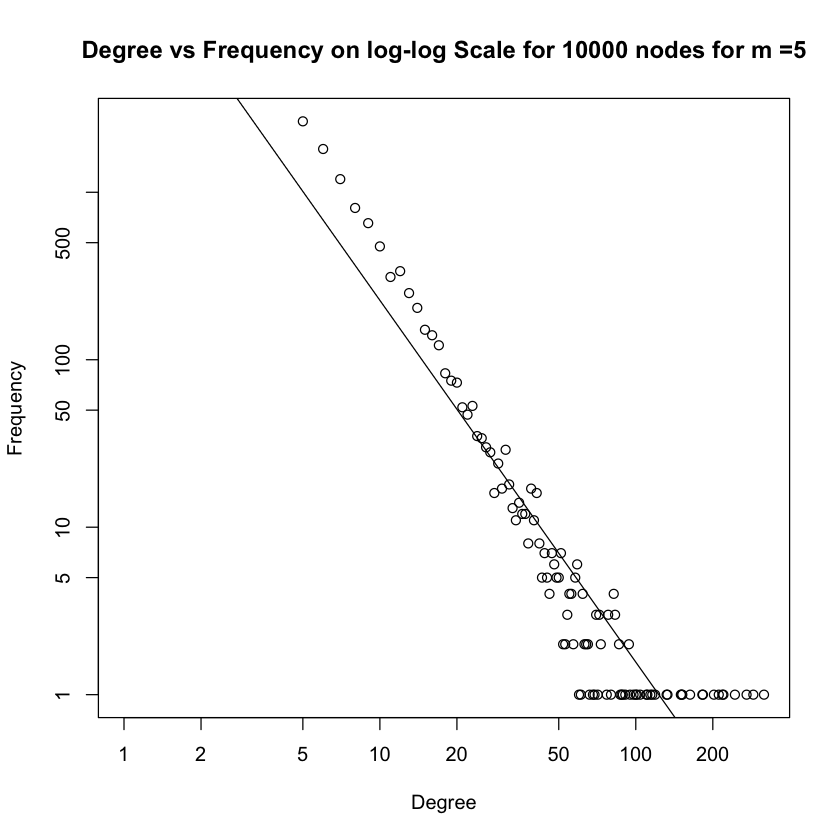

(Intercept)      lnodes 
   2.543910   -1.022468 


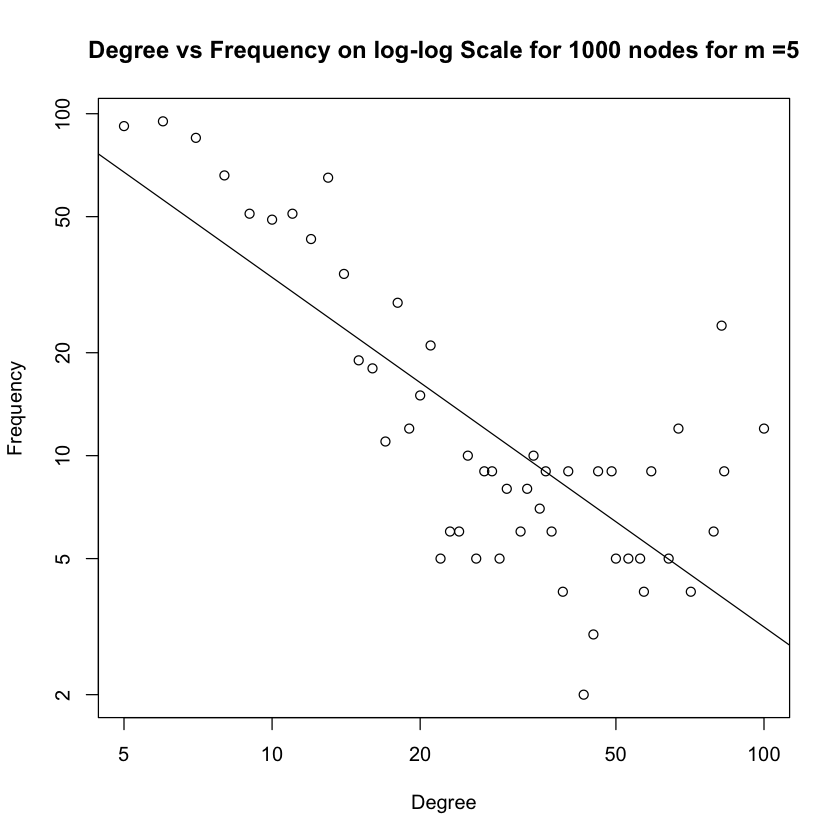

(Intercept)      lnodes 
  2.3165013  -0.9743645 


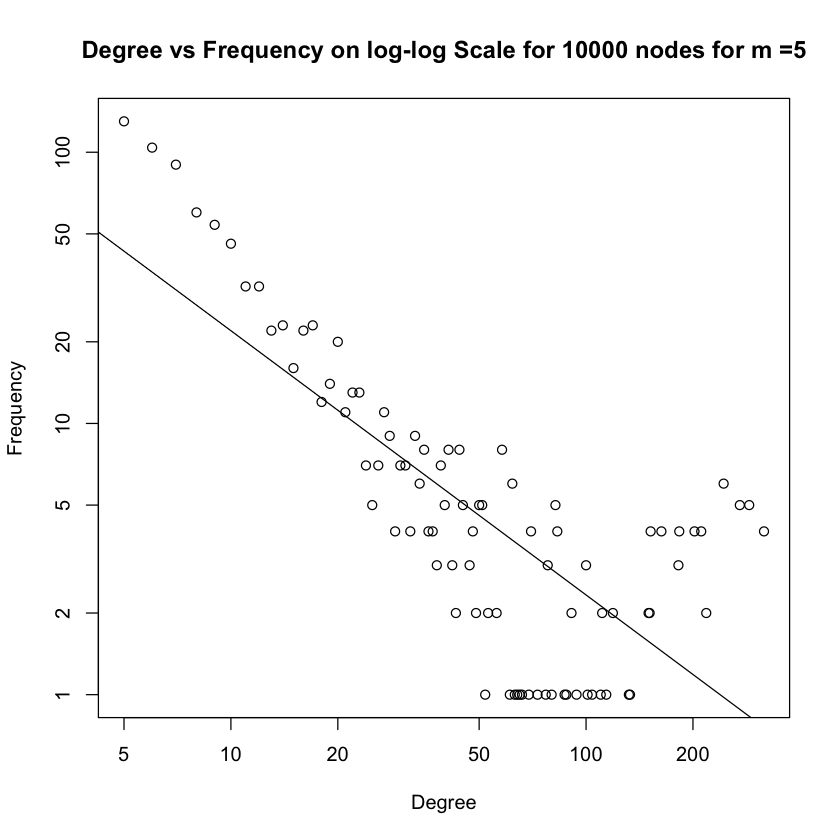

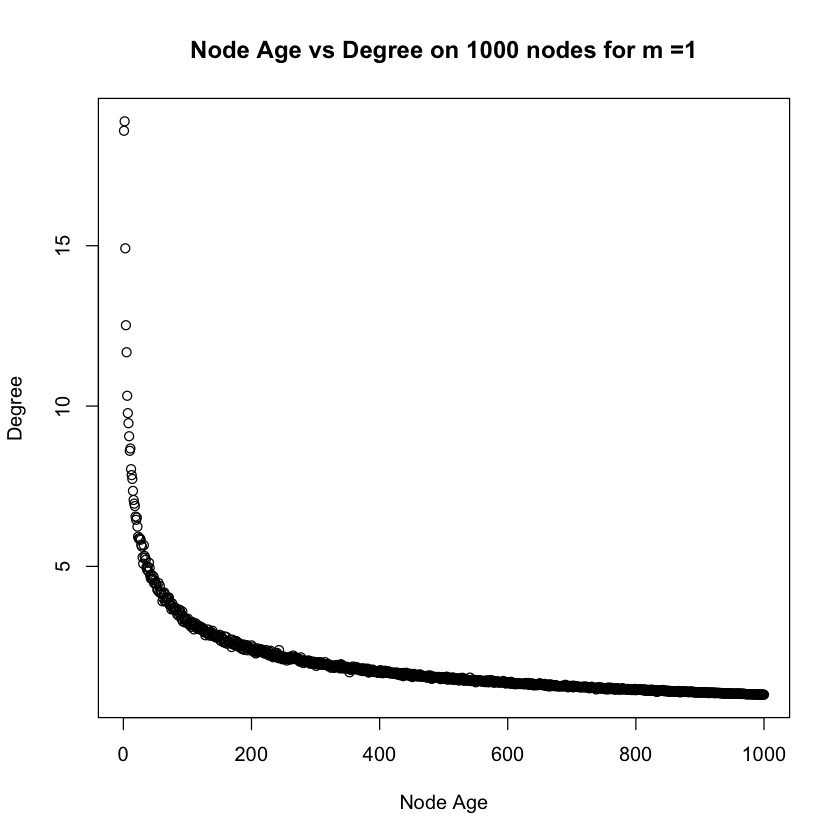

In [307]:
m_list = c(2, 5)

for (i in 1:length(m_list)){
    n = 1000
    m = m_list[i]
    g_pa = sample_pa(n=n, m=m, directed = FALSE)
    cat("Is connected:", is_connected(g_pa), "\n")
    
    comm = cluster_fast_greedy(g_pa)
    mod = modularity(comm)
    print(mod)
    
    n = 10000
    g_pa2 = sample_pa(n=n, m=m, directed = FALSE)
    cat("Is connected:", is_connected(g_pa2), "\n")
    comm2 = cluster_fast_greedy(g_pa2)
    mod2 = modularity(comm2)
    print(mod2)
    
    dd = degree_distribution(g_pa, mode="all")*1000
    nodes = c(0:(length(dd)-1))

    ldd = log(dd,base=10)
    to_remove = which(ldd == -Inf)
    ldd = ldd[-to_remove]
    lnodes = log(nodes[-to_remove],base=10)
    coeff = lm(ldd~lnodes)$coefficients
    plot(dd~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 1000 nodes for m =", m), xlab="Degree", ylab="Frequency") 
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    dd2 = degree_distribution(g_pa2)*10000
    nodes = c(0:(length(dd2)-1))

    ldd = log(dd2,base=10)
    to_remove = which(ldd == -Inf)
    ldd = ldd[-to_remove]
    lnodes = log(nodes[-to_remove],base=10)
    coeff = lm(ldd~lnodes)$coefficients
    plot(dd2~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 10000 nodes for m =", m), xlab="Degree", ylab="Frequency")  
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    iter = 1000
    degree_list = c(1:iter)
    for (i in 1:iter){
        i_node = sample(c(1:1000), size=1)
        j_cand = neighbors(g_pa, i_node)
        j_node = sample(j_cand, size=1)
        degree_list[i] = degree(g_pa, j_node)
    }
    dd3 = cbind(table(degree_list))
    nodes = as.integer(names(table(degree_list)))
    
    ldd = log(dd3,base=10)
    lnodes = log(nodes,base=10)

    coeff = lm(ldd~lnodes)$coefficients
    plot(dd3~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 1000 nodes for m =", m), xlab="Degree", ylab="Frequency")  
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    iter = 1000
    degree_list = c(1:iter)
    for (i in 1:iter){
        i_node = sample(c(1:1000), size=1)
        j_cand = neighbors(g_pa2, i_node)
        j_node = sample(j_cand, size=1)
        degree_list[i] = degree(g_pa2, j_node)
    }
    dd4 = cbind(table(degree_list))
    nodes = as.integer(names(table(degree_list)))
    
    ldd = log(dd4,base=10)
    lnodes = log(nodes,base=10)

    coeff = lm(ldd~lnodes)$coefficients
    plot(dd4~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 10000 nodes for m =", m), xlab="Degree", ylab="Frequency")  
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    iter = 1000
    n = 1000
    m = 1
    degree_list = c(1:n)*0
    for (i in 1:iter){
    g_pa = sample_pa(n=n, m=m, directed = FALSE)
    degree_list = degree_list+degree(g_pa)
    }
    
    plot(degree_list/iter, main=paste0("Node Age vs Degree on 1000 nodes for m =", m), xlab="Node Age", ylab="Degree")
}

Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

[1] 36
[1] 0.933442


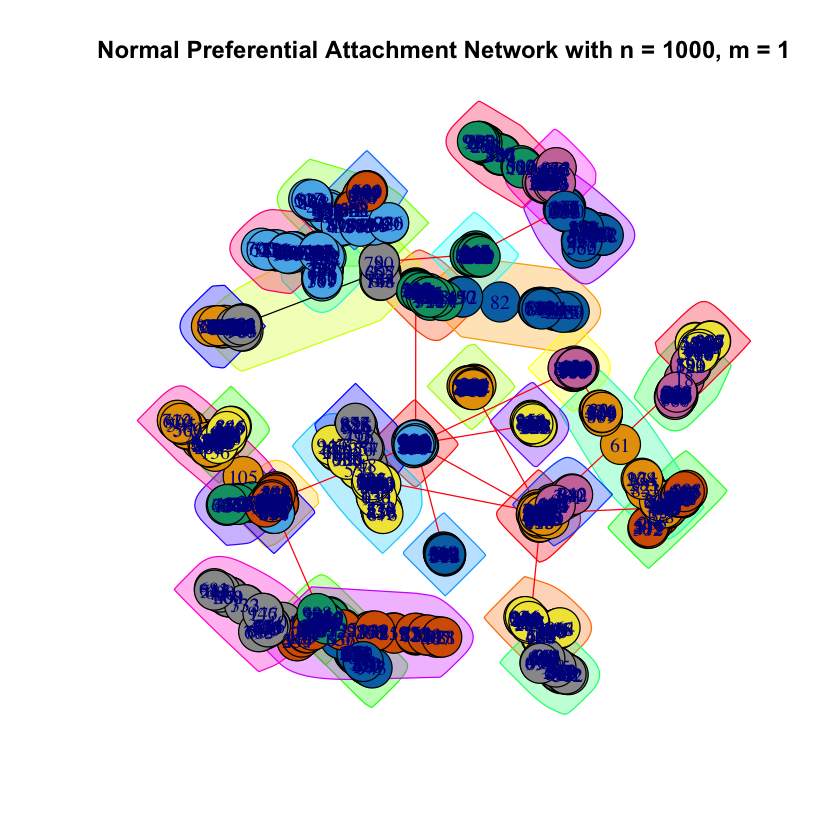

[1] 188
[1] 0.7747238


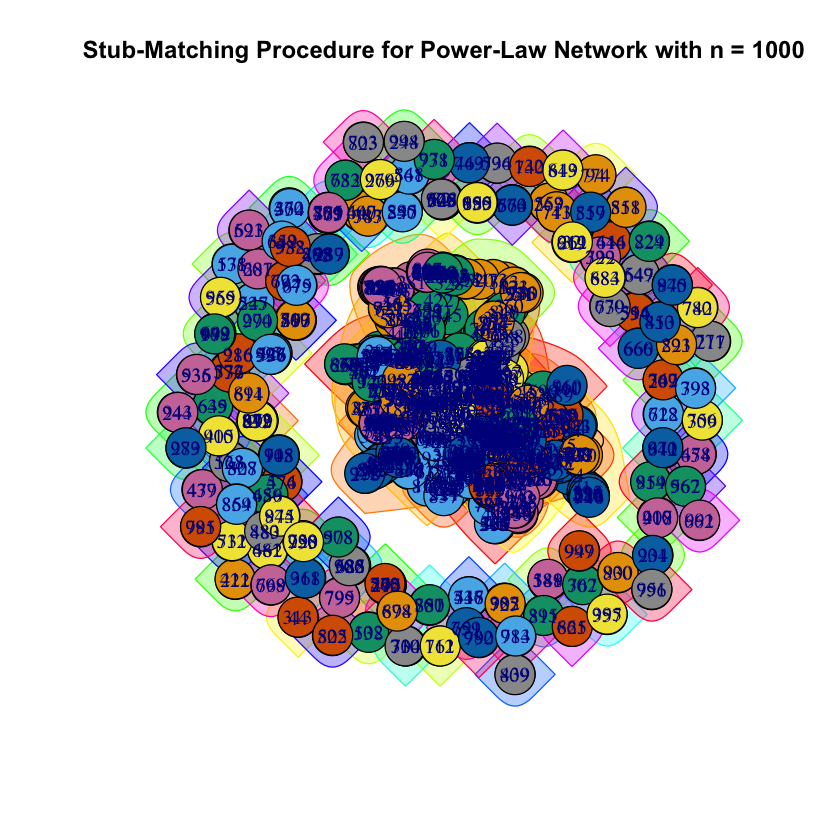

In [317]:
n = 1000
m = 1
g_pa = sample_pa(n=n, m=m, directed = FALSE)
eb = edge.betweenness.community(g_pa)
g_pa_dup = sample_degseq(degree(g_pa))
eb_dup = edge.betweenness.community(g_pa_dup)

plot(eb, g_pa, main="Normal Preferential Attachment Network with n = 1000, m = 1")

comm = cluster_fast_greedy(g_pa)
mod = modularity(comm)
print(length(comm))
print(mod)

plot(eb_dup, g_pa_dup, main="Stub-Matching Procedure for Power-Law Network with n = 1000")

comm = walktrap.community(g_pa_dup)
mod = modularity(comm)
print(length(comm))
print(mod)



## Modified Preferential Attachment Model that penalizes the Age of a Node